In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## Understanding Data Asking Basic Questions

- **Basic look**

In [167]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Shape of Data**

In [168]:
train.shape

(891, 12)

- **Information**

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Describation**

In [170]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **Duplicates**

In [171]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


- **NULL Values**

In [172]:
## train data
print(train.isnull().sum()/len(train) * 100 )

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [173]:
## test data
print(test.isnull().sum()/len(test) * 100 ) 

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


- **Balance of independent**

In [174]:
train['Survived'].value_counts()/len(train) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [175]:
train['Sex'].value_counts()/len(train)*100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

- **Observation**

1.There are total 12 columns and 891 rows
2.There are some missing values in Age , Cabine , Fare , Embarked
3.The Cabin has missing value more than 75% 
4.The percentage of survive is low compare to death
5.There are more male compare to female

## EDA

- **univariet analysis**

In [176]:
num_cols = train.select_dtypes(include=['int64', 'float64'])
cat_cols = train.select_dtypes(include=['object'])

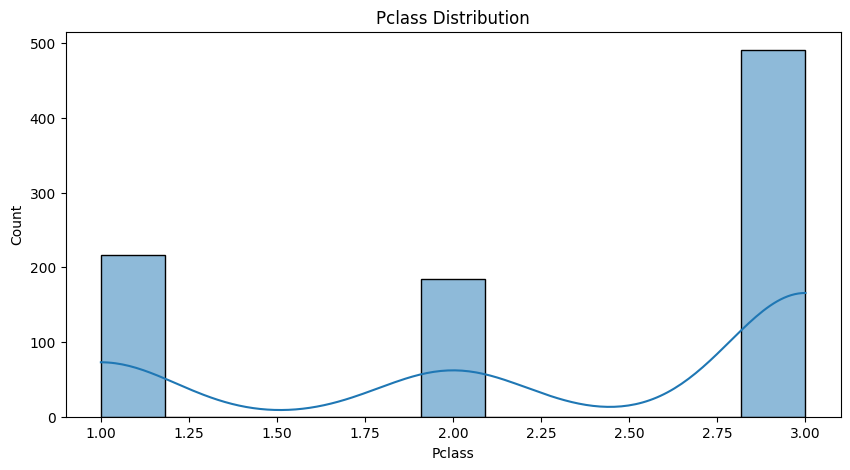

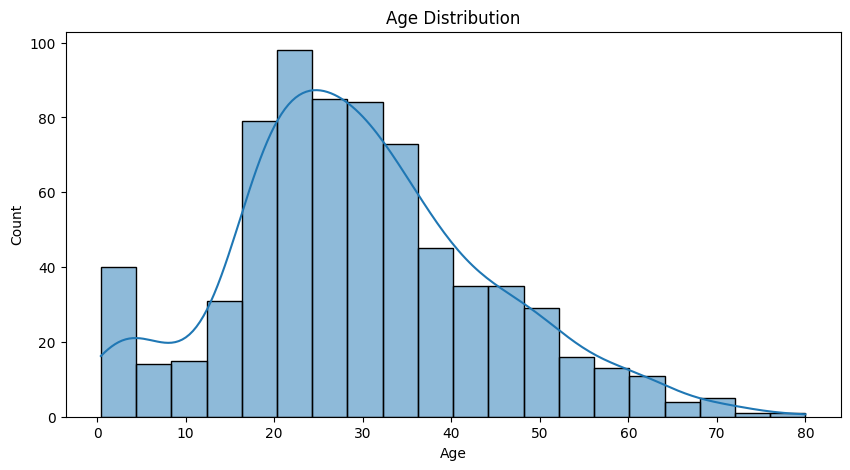

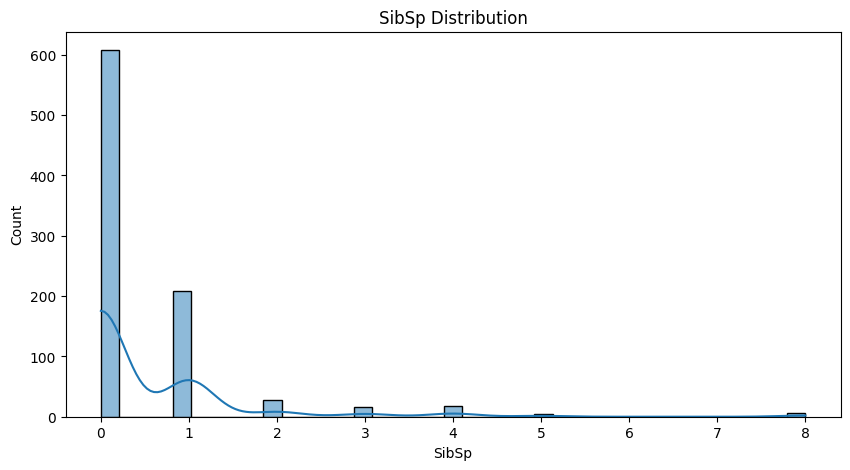

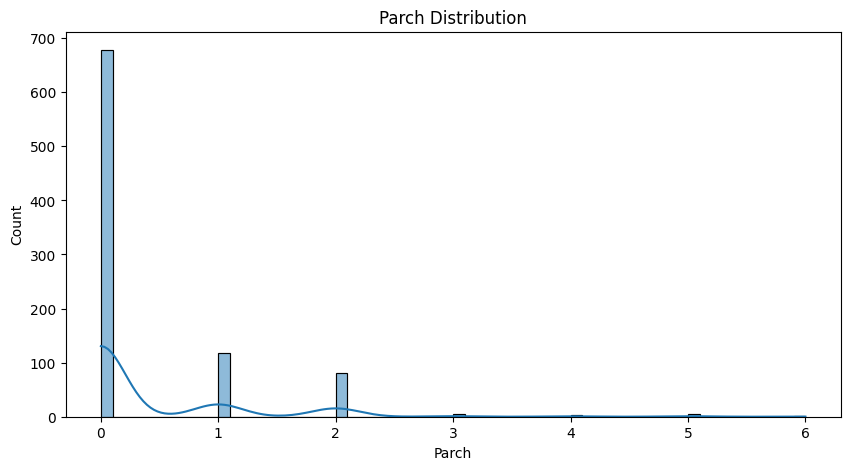

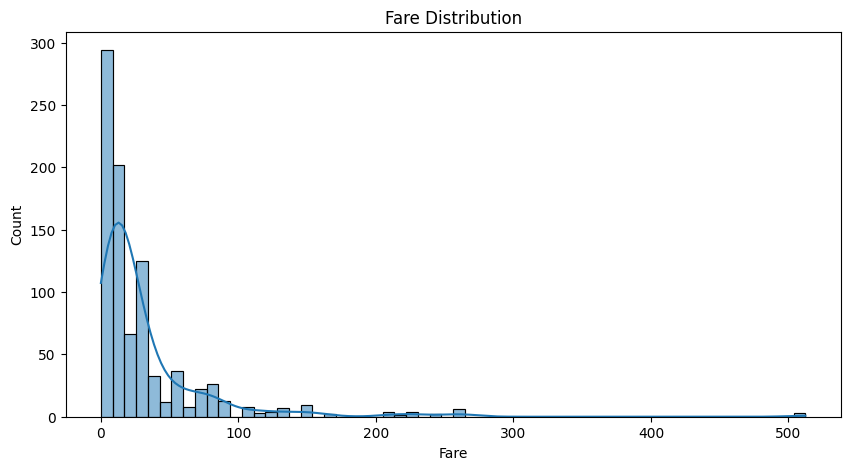

In [177]:
for col in num_cols.columns:
    if col == 'Survived' or col == 'PassengerId'   or col == 'Ticket' or col == 'Cabin':
        continue
    plt.figure(figsize=(10,5))
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

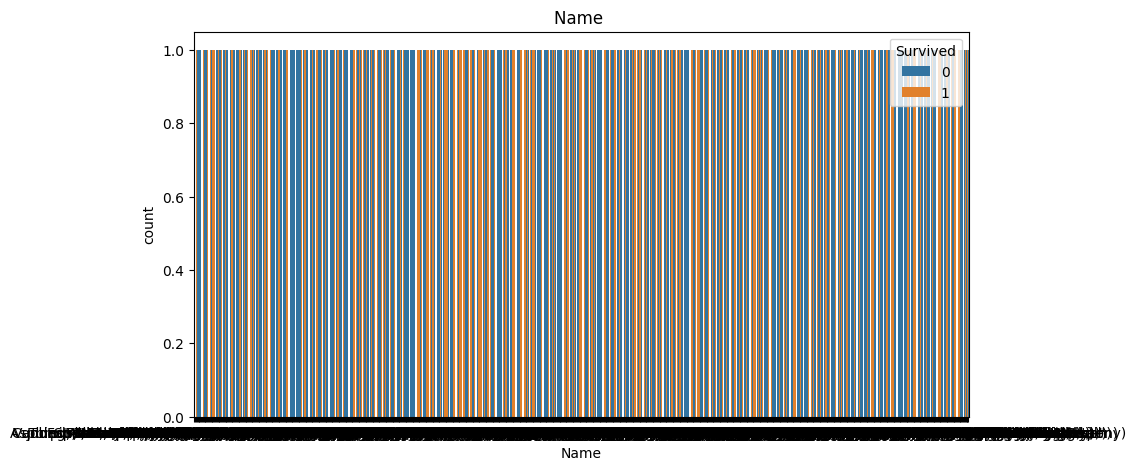

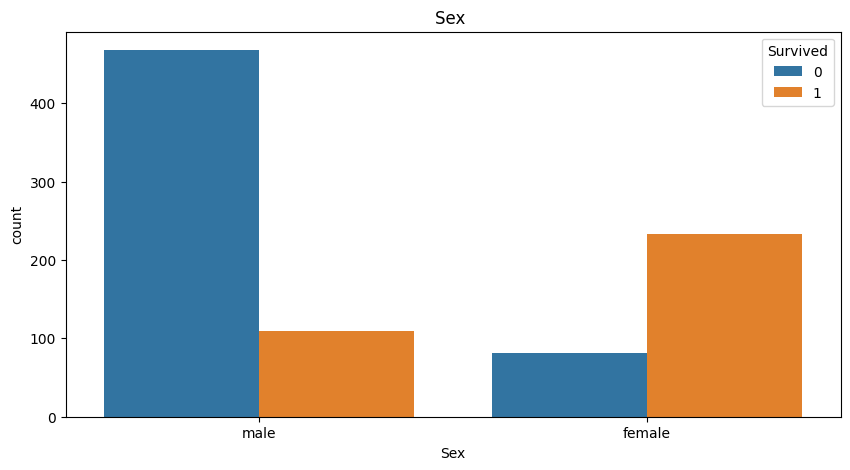

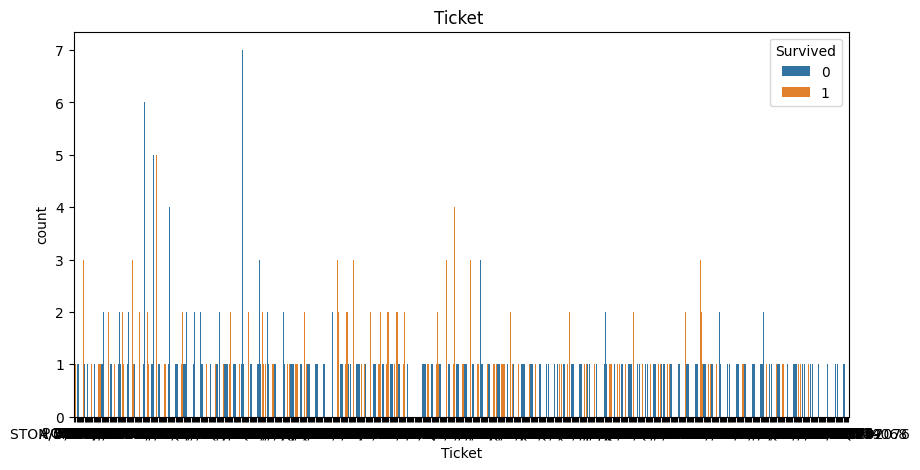

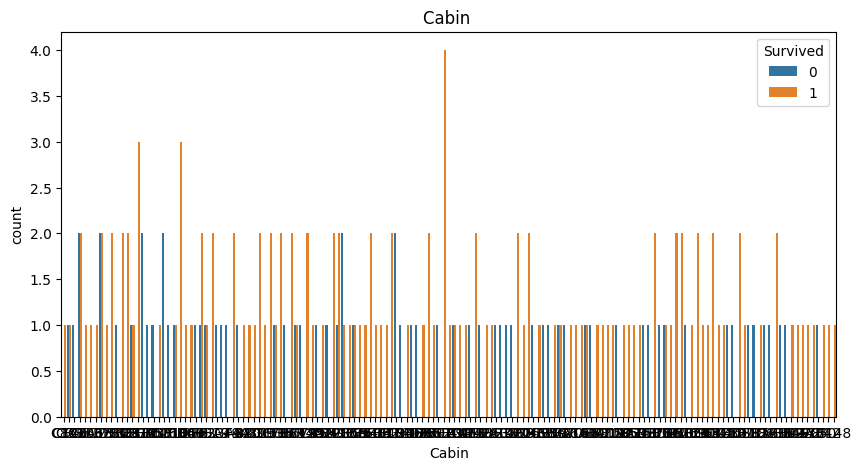

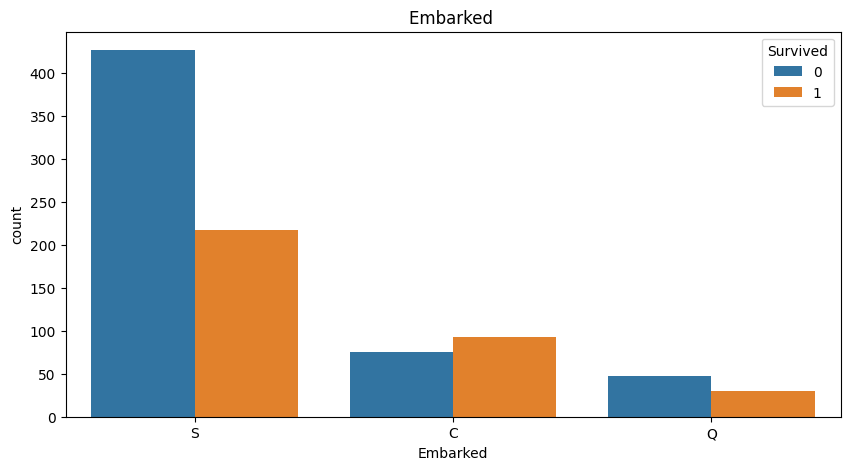

In [ ]:
for col in cat_cols.columns:
    if col == 'Name' or col == 'Ticket' or col == 'Cabin':
        continue
    plt.figure(figsize=(10,5))
    sns.countplot(x=col ,data=train,hue='Survived')
    plt.title(f'{col} ')
    plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

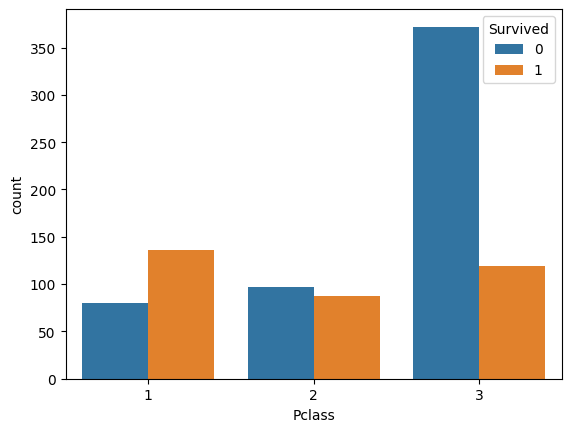

In [179]:
sns.countplot(x='Pclass', data=train, hue='Survived')

## Preprocessing

In [180]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV



In [181]:
def assign_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    else:
        return 'other'

### Feature Engineering

In [182]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Family_Size'] = X['SibSp'] + X['Parch'] + 1
        X['Title'] = X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        X['Title'] = X['Title'].apply(assign_title)
        return X.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)

In [183]:
class MissingAgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,x,y=None):
        self.age_mean = x.groupby('Title')['Age'].mean()
        return self
    def transform(self, x):
        x = x.copy()
        x['Age'] = x.apply(lambda row: self.age_mean[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)
        return x


In [184]:
num_pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [185]:
cat_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [186]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, ['Age', 'Fare', 'Family_Size']),
        ('cat', cat_pipe, ['Embarked', 'Title','Sex']) 
    ]
)

## Model

In [187]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('custom_transformer', CustomTransformer()),
    ('MissingAgeImputer', MissingAgeImputer()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [188]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200,300],
    'classifier__max_depth': [3, 5, 10, 15,None],
    'classifier__min_samples_split': [2, 5,10],
    'classifier__min_samples_leaf': [1, 2,5],
    'classifier__bootstrap': [True, False]
}

In [189]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [190]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [191]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__bootstrap': [True, False], 'classifier__max_depth': [3, 5, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


## Model perfomance

In [192]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__bootstrap': False, 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.8314488328572835


In [193]:
y_pred = grid_search.predict(X_val)

In [194]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion_matric")
print(confusion_matrix(y_val, y_pred))
print("classification_report")
print(classification_report(y_val, y_pred))

Accuracy: 0.8491620111731844
F1 Score: 0.8163265306122449
Confusion_matric
[[92 13]
 [14 60]]
classification_report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## Submission file

In [199]:
y_pred = grid_search.predict(test)

submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": y_pred
})
submission.to_csv("../data/submission.csv", index=False)

## Pickle

In [200]:
import pickle

In [212]:
with open('../src/model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [206]:
col_types = train.drop(columns=['Survived']).dtypes.apply(lambda x:str(x)).to_dict()
col_types

{'PassengerId': 'int64',
 'Pclass': 'int64',
 'Name': 'object',
 'Sex': 'object',
 'Age': 'float64',
 'SibSp': 'int64',
 'Parch': 'int64',
 'Ticket': 'object',
 'Fare': 'float64',
 'Cabin': 'object',
 'Embarked': 'object'}

In [211]:
with open('../src/col_types.pkl', 'wb') as f:
    pickle.dump(col_types, f)

In [208]:
categories = {}
for col, dtype in col_types.items():
    if dtype == 'object':
        categories[col] = list(X[col].unique())

In [210]:
with open('../src/categories.pkl', 'wb') as f:
    pickle.dump(categories, f)